## 🚀 Meu Primeiro Modelo com Scikit-learn

O objetivo deste módulo é colocar a **“mão na massa”** e desenvolver um **primeiro modelo de machine learning**, com foco em:

- Reforçar alguns **conceitos fundamentais de Machine Learning**
- Fazer uma **exploração inicial da biblioteca Scikit-learn**

A biblioteca **Scikit-learn** será utilizada ao longo da trilha para aplicar os conceitos aprendidos.

---

## 📚 O que é a biblioteca Scikit-learn?

A **Scikit-learn** é uma biblioteca popular de **aprendizado de máquina** para a linguagem de programação **Python**.

Ela oferece uma variedade de ferramentas e algoritmos para tarefas como:

- **Classificação**
- **Regressão**
- **Clusterização**
- **Redução de dimensionalidade**

Além disso, é conhecida por sua:

- **Facilidade de uso**
- Documentação abrangente
- Integração com outras bibliotecas como: **NumPy**, **Pandas** e **Matplotlib**

🔹 É uma escolha comum entre cientistas de dados e desenvolvedores para criação de modelos de ML e análise de dados.

---

## 🧪 Descrição do Problema

Um laboratório de análises clínicas, com base em **dados de pacientes que realizaram exames de diabetes**, deseja prever — a partir de características como **idade, peso e altura** — **o resultado esperado do exame para novos pacientes**.

Para isso, será treinado um **algoritmo supervisionado** (visto que temos os dados reais dos exames) com o objetivo de criar um modelo preditivo que atenda às necessidades do laboratório.

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# carregar arquivo para um dataframe
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [4]:
# visualizar estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [15]:
# apresentar as 10 primeiras linhas
df_exames.head(10)

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
5,M,64,93,190,117
6,F,21,70,182,90
7,F,60,101,179,84
8,F,63,83,189,92
9,F,65,78,175,121


In [6]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [14]:
# remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [16]:
# converter uma variavel categorica (genero) em numerica, usando One-Hot Enconding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [17]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

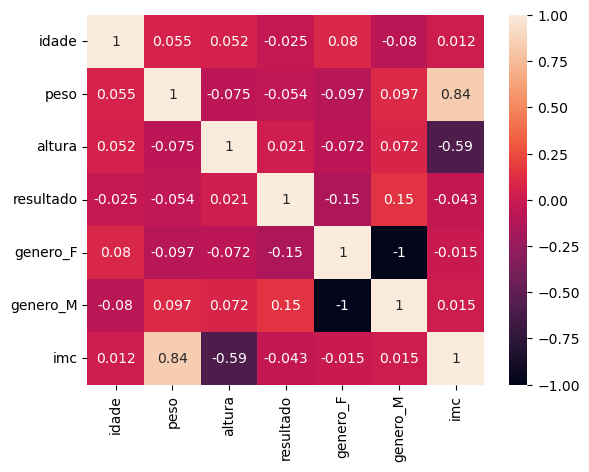

In [28]:
# apresentar mapa de calor com correlacao entre as variaveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

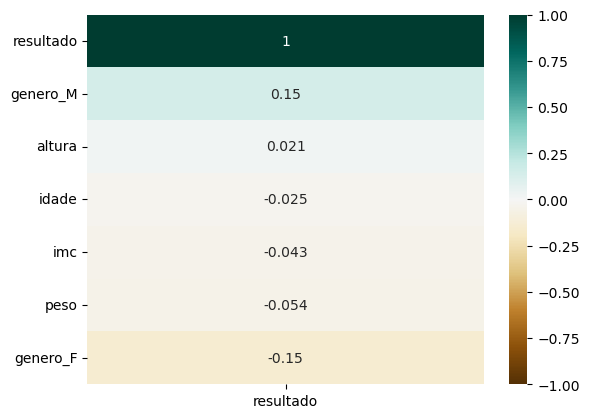

In [29]:
# mapa de correlacao so com a variavel target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

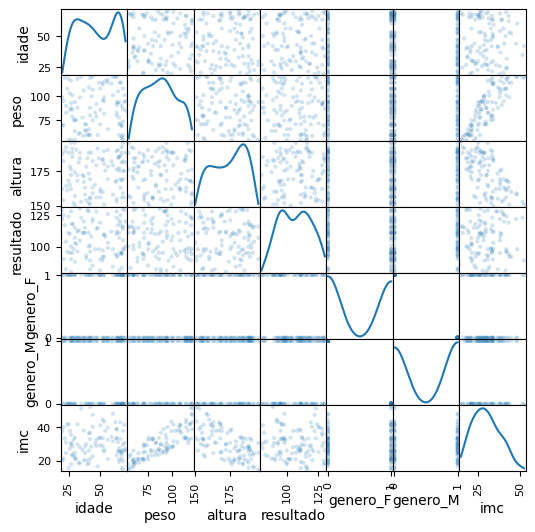

In [30]:
# plot de scatter (dispersao) com distribuicao
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

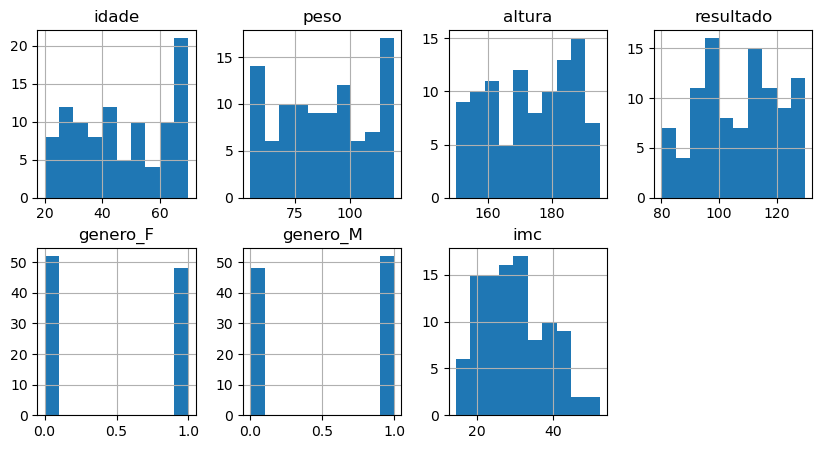

In [33]:
# histograma de todas as variaveis
df_exames.hist(layout=(2,4), figsize=(10,5))

### Criar uma feature nova

**IMC (Índice de Massa Corporal)**  
Fórmula:  
`IMC = peso (kg) / altura (m) ²`

In [25]:
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100)**2))

In [26]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [27]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [34]:
# importar bibliotecas no sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [36]:
# modelo 1 - sem imc
X = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']

In [40]:
# dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [46]:
# treinar o algoritmo de regressao linear - modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [47]:
# gerar predicoes do conjunto de testes com base no modelo 1
y_pred = model_1.predict(X_test)

In [48]:
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [49]:
# equacao da reta - regressao linear
# y = ax + b
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [50]:
model_1.intercept_

np.float64(94.21133142019876)

In [51]:
# R2 Score - conjunto de treinamento
model_1.score(X_train, y_train)

0.06218388634297234

In [52]:
# R2 Score - conjunto de testes
model_1.score(X_test, y_test)

-0.13640904479106397

In [53]:
# R2 Score - testes
r2_score(y_test, y_pred)

-0.13640904479106397

In [54]:
# MAE (mean absolute error)
mean_absolute_error(y_test, y_pred)

12.695569181179541

In [56]:
# segundo modelo - apenas imc
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [57]:
# dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [59]:
# treinar o algoritmo de regressao linear - modelo 2
model_2 = LinearRegression().fit(X_train, y_train)

In [60]:
# gerar predicao com base no modelo para o conjunto de testes
y_pred = model_2.predict(X_test)

In [61]:
model_2.coef_

array([-0.21677589])

In [62]:
model_2.intercept_

np.float64(112.15019229088836)

In [63]:
# r2 score no conjunto de treinamento
model_2.score(X_train, y_train)

0.015285962664806751

In [64]:
# r2 score no conjunto de teste
model_2.score(X_test, y_test)

-0.0889832856240178

In [65]:
# MAE (mean absolute error)
mean_absolute_error(y_test, y_pred)

12.505651407060103

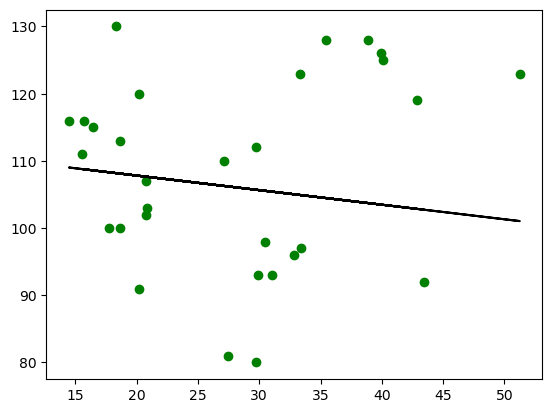

In [67]:
# mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')